In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# ignore imputation warnings from pymc
# ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
import warnings
from pymc import ImputationWarning

warnings.filterwarnings("ignore", category=ImputationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [6]:
from birdcall_distribution.data import prepare_dataframe

prep_df, W = prepare_dataframe(
    "../data/ee_v3_western_us_2.parquet",
    "../data/raw/birdclef-2022/train_metadata.csv",
    n_species=3,
)
prep_df.head()

,primary_label,grid_id,y,region,grid_size,population_density,elevation_p5,elevation_p50,elevation_p95,LST_Day_1km_p5,...,land_cover_08,land_cover_09,land_cover_10,land_cover_11,land_cover_12,land_cover_13,land_cover_14,land_cover_15,land_cover_16,land_cover_17
adjacency_idx,,,,,,,,,,,,,,,,,,,,,
0,other,-103_37,9.0,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
0,normoc,-103_37,3.0,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
0,wesmea,-103_37,2.0,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
0,houfin,-103_37,NaN,western_us,2,59513.489132,917.473286,1113.467367,1389.580957,25.930530,...,0,0,25124,0,13749,9,0,0,10,10
1,normoc,-103_39,NaN,western_us,2,72311.465983,933.400010,1109.527419,1373.500000,23.530828,...,0,0,26593,1,11191,14,0,0,5,5


random_intercept_model


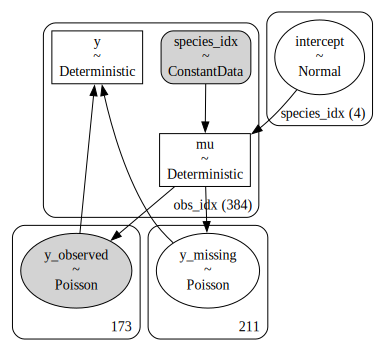

pooled_intercept_pooled_covariate_model


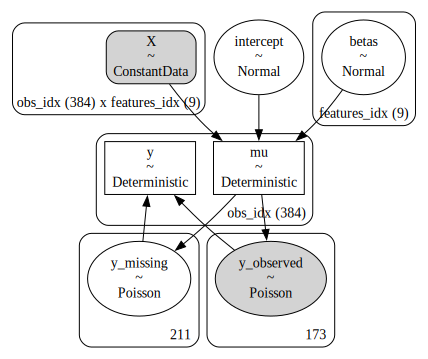

pooled_intercept_random_covariate_model


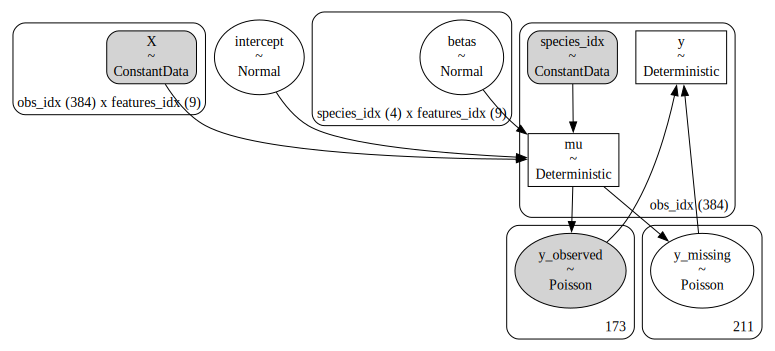

random_intercept_pooled_covariate_model


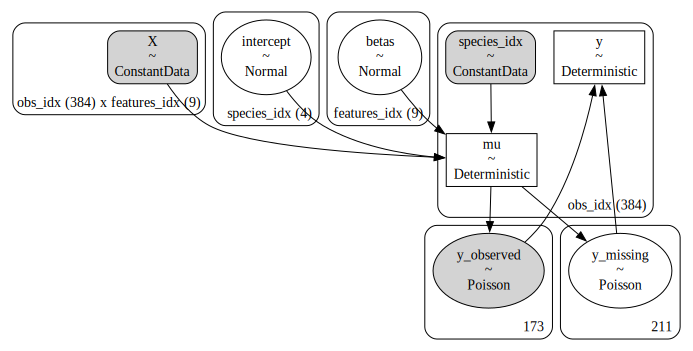

random_intercept_random_covariate_model


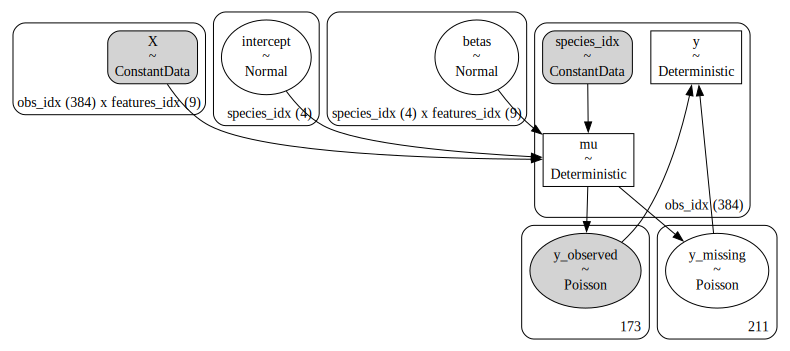

random_intercept_car_model


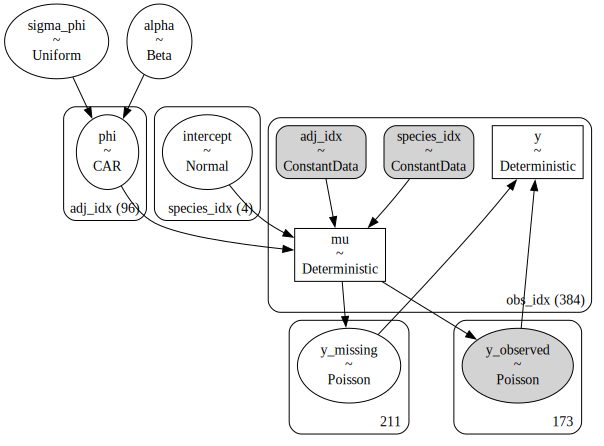

pooled_intercept_car_model


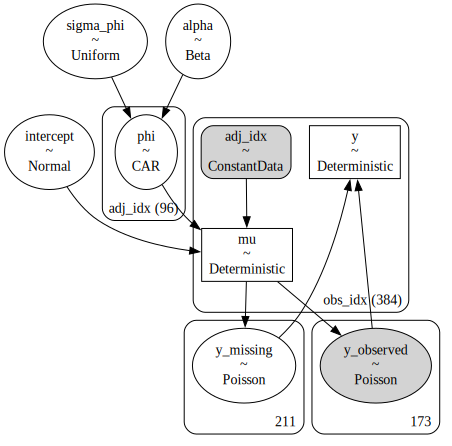

pooled_intercept_random_covariate_car_model


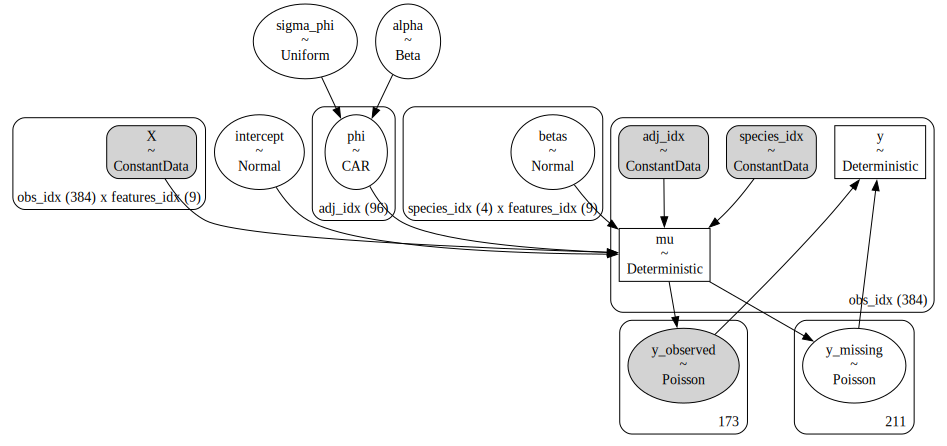

random_intercept_pooled_covariate_car_model


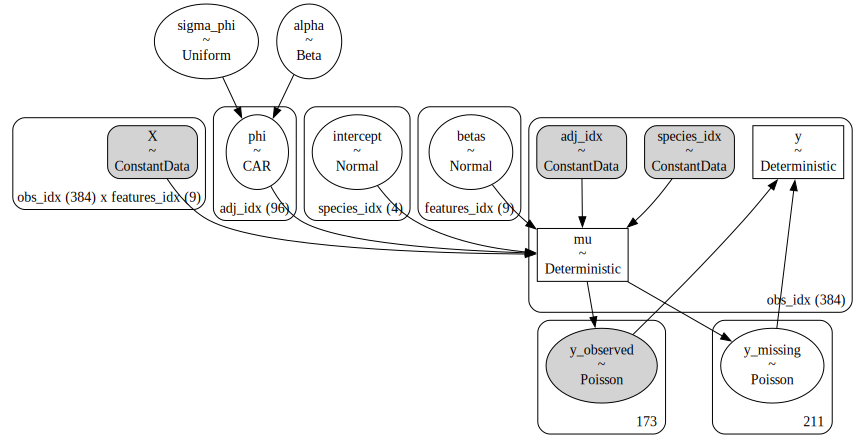

In [85]:
from birdcall_distribution import model
import pymc as pm
import arviz as az

# display function
from IPython.display import display

models = {
    "random_intercept_model": model.make_random_intercept_model,
    "pooled_intercept_pooled_covariate_model": model.make_pooled_intercept_pooled_covariate_model,
    "pooled_intercept_random_covariate_model": model.make_pooled_intercept_random_covariate_model,
    "random_intercept_pooled_covariate_model": model.make_random_intercept_pooled_covariate_model,
    "random_intercept_random_covariate_model": model.make_random_intercept_random_covariate_model,
    "random_intercept_car_model": model.make_random_intercept_car_model,
    "pooled_intercept_car_model": model.make_pooled_intercept_car_model,
    "pooled_intercept_random_covariate_car_model": model.make_pooled_intercept_random_covariate_car_model,
    "random_intercept_pooled_covariate_car_model": model.make_random_intercept_pooled_covariate_car_model,
}

# test that all the models are dimensionally correct
for name, func in models.items():
    print(name)
    m = func(prep_df, W)
    # graphviz
    display(pm.model_to_graphviz(m))

In [86]:
# test that all the models can be sampled correctly
for name, func in models.items():
    print(name)
    model = func(prep_df, W)
    with model:
        trace = pm.sample(10, tune=0, cores=1, chains=1)

Only 10 samples in chain.


random_intercept_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


pooled_intercept_pooled_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 1 seconds.
Only 10 samples in chain.


pooled_intercept_random_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


random_intercept_pooled_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 1 seconds.
Only 10 samples in chain.


random_intercept_random_covariate_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 0 seconds.
Only 10 samples in chain.


random_intercept_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 1 seconds.
Only 10 samples in chain.


pooled_intercept_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 1 seconds.
Only 10 samples in chain.


pooled_intercept_random_covariate_car_model


Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 1 seconds.


random_intercept_pooled_covariate_car_model


Only 10 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas]
>Metropolis: [y_missing]


Sampling 1 chain for 0 tune and 10 draw iterations (0 + 10 draws total) took 1 seconds.


In [87]:
# now sample everything for real, and store the traces
traces = {}
for name, func in models.items():
    print(name)
    model = func(prep_df, W)
    with model:
        trace = pm.sample(2000, tune=1000, cores=8, target_accept=0.9)
    traces[name] = trace

random_intercept_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 103 seconds.


pooled_intercept_pooled_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 124 seconds.


pooled_intercept_random_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 145 seconds.


random_intercept_pooled_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 118 seconds.


random_intercept_random_covariate_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 155 seconds.


random_intercept_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 160 seconds.


pooled_intercept_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 167 seconds.


pooled_intercept_random_covariate_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 480 seconds.


random_intercept_pooled_covariate_car_model


Multiprocess sampling (8 chains in 8 jobs)
CompoundStep
>NUTS: [alpha, sigma_phi, phi, intercept, betas]
>Metropolis: [y_missing]


Sampling 8 chains for 1_000 tune and 2_000 draw iterations (8_000 + 16_000 draws total) took 448 seconds.


In [89]:
az.compare(traces, ic="waic", scale="deviance")

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
random_intercept_pooled_covariate_car_model,0,1301.223555,164.080768,0.000000,0.598904,133.146099,0.000000,True,deviance
random_intercept_car_model,1,1302.449792,164.792534,1.226237,0.000000,132.169953,4.403288,True,deviance
pooled_intercept_random_covariate_car_model,2,1553.906498,274.055872,252.682943,0.198594,96.438563,152.156156,True,deviance
random_intercept_random_covariate_model,3,2935.657154,483.686288,1634.433599,0.038178,435.722502,395.025362,True,deviance
random_intercept_pooled_covariate_model,4,2998.386443,338.588814,1697.162889,0.120906,502.051810,439.856704,True,deviance
pooled_intercept_random_covariate_model,5,3239.516725,535.182783,1938.293171,0.000000,459.685414,427.871996,True,deviance
pooled_intercept_car_model,6,3397.204054,634.414688,2095.980499,0.035638,435.864497,423.375066,True,deviance
random_intercept_model,7,4024.336778,116.218967,2723.113223,0.005425,804.397824,779.214340,True,deviance
pooled_intercept_pooled_covariate_model,8,4309.323300,441.178422,3008.099745,0.002355,850.830214,824.687312,True,deviance
